# Diabetes Prediction System 1 using SVM Classifier

![Diabetes Prediction System Overview](DiabetesBanner.jpg)

This project aims to develop a diabetes prediction system using a Support Vector Machine (SVM) classifier. The system utilizes the SVM algorithm from scratch to analyze a given dataset and predict the likelihood of an individual having diabetes based on their medical history and demographic information.

## Features

The dataset used in this system contains several input features, including:

1. Pregnancies: Number of times pregnant.
2. Glucose: Plasma glucose concentration after 2 hours in an oral glucose tolerance test.
3. BloodPressure: Diastolic blood pressure (mm Hg).
4. SkinThickness: Triceps skinfold thickness (mm).
5. Insulin: 2-Hour serum insulin (mu U/ml).
6. BMI: Body mass index (weight in kg / (height in m)^2).
7. DiabetesPedigreeFunction: Diabetes pedigree function, which represents the likelihood of diabetes based on family history.
8. Age: Age of the patient.


## SVM Classifier

The SVM classifier is a supervised learning algorithm used for classification tasks. It creates a hyperplane that separates the data points into different classes. In this project, the SVM classifier is implemented, which involves the following steps:

1. **Importing the Dependencies**: The required libraries are implemented to work with the project.
2. **Data Collection**: The data has been imported as a csv file and loaded into a dataframe using Pandas.
3. **Exploratory Data Analysis**: The loaded data has been analyzed and visualized to gain insights, understand patterns, detect outliers, and identify relationships between variables.
4. **Data Preprocessing**: The dataset is preprocessed by handling missing values, standardizing features, and splitting it into training and testing sets.
5. **Model Training**: The SVM classifier is trained on the training set using the gradient descent algorithm, which optimizes the hyperplane.
6. **Prediction**: The trained SVM classifier is used to predict the likelihood of an individual having diabetes on the testing set.
7. **Evaluation**: The performance of the SVM classifier is evaluated using metrics such as accuracy, precision, recall, and F1 score.
8. **Predictive System**: A predictive system has been built to take input and predict the likelihood of an individual having diabetes.

## 1. Importing the Dependencies

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## 2. Data Collection

The dataset named diabetes.csv has been imported and loaded into the pandas dataframe.

**Source: Kaggle**

In [2]:
data = pd.read_csv('diabetes.csv')

## 3. Exploratory Data Analysis

The given dataset has been analyzed by it's statistical parameters and visualized through various plots and charts to gian insights on relationships or trends between features.

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values or null values present in this dataset

#### Visualization

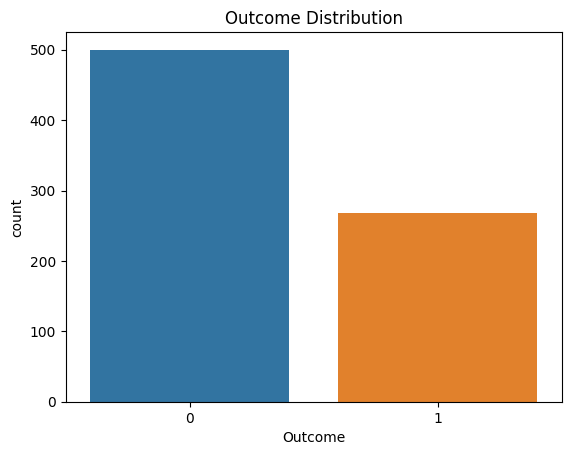

In [10]:
sns.countplot(x = 'Outcome', data = data)
plt.title('Outcome Distribution')
plt.show()

In [11]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

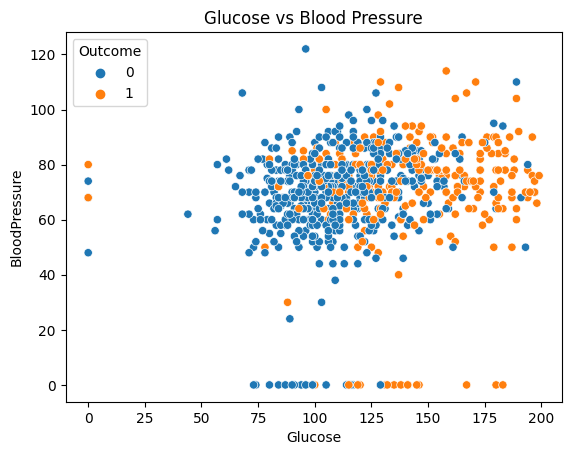

In [12]:
sns.scatterplot(data, x= data['Glucose'], y=data['BloodPressure'], hue = data['Outcome'])
plt.title('Glucose vs Blood Pressure')
plt.show()

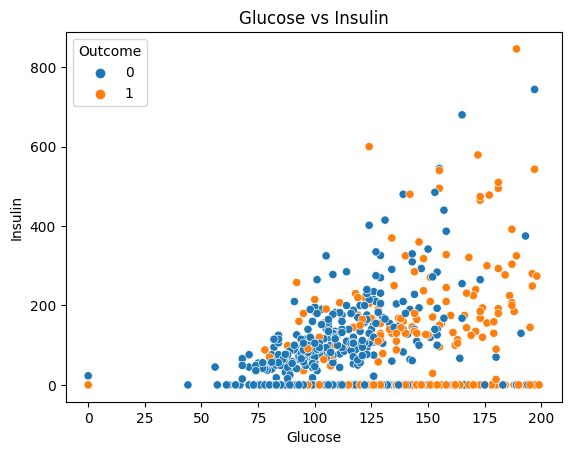

In [13]:
sns.scatterplot(data, x= data['Glucose'], y=data['Insulin'], hue = data['Outcome'])
plt.title('Glucose vs Insulin')
plt.show()

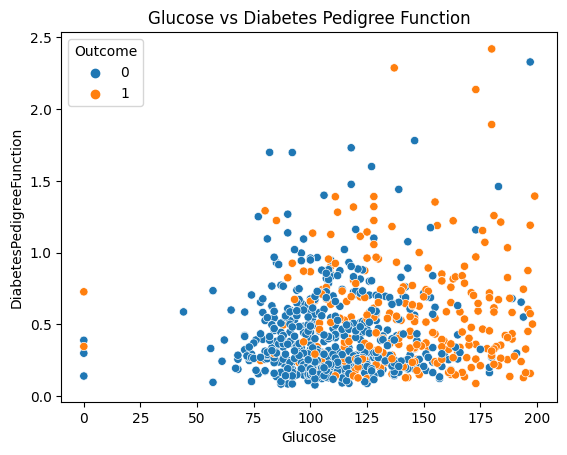

In [14]:
sns.scatterplot(data, x= data['Glucose'], y=data['DiabetesPedigreeFunction'], hue = data['Outcome'])
plt.title('Glucose vs Diabetes Pedigree Function')
plt.show()

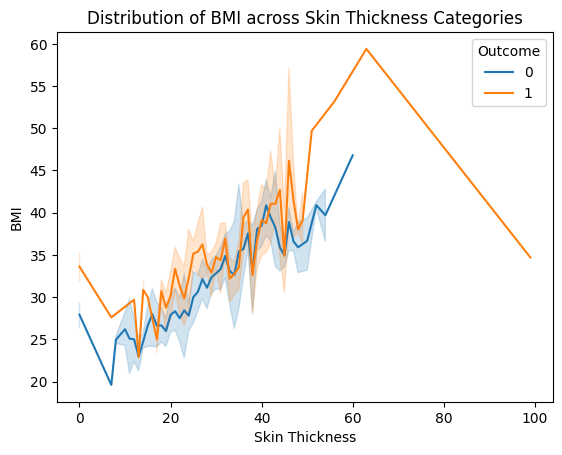

In [28]:
sns.lineplot(x=data['SkinThickness'], y=data['BMI'], hue = data['Outcome'])
plt.title('Distribution of BMI across Skin Thickness Categories')
plt.xlabel('Skin Thickness')
plt.ylabel('BMI')
plt.show()

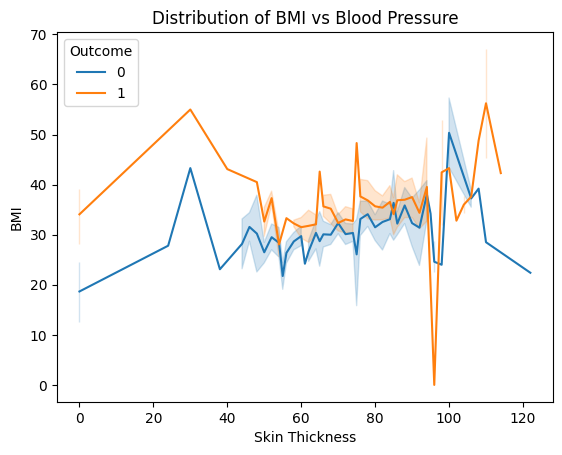

In [29]:
sns.lineplot(x=data['BloodPressure'], y=data['BMI'], hue = data['Outcome'])
plt.title('Distribution of BMI vs Blood Pressure')
plt.xlabel('Skin Thickness')
plt.ylabel('BMI')
plt.show()

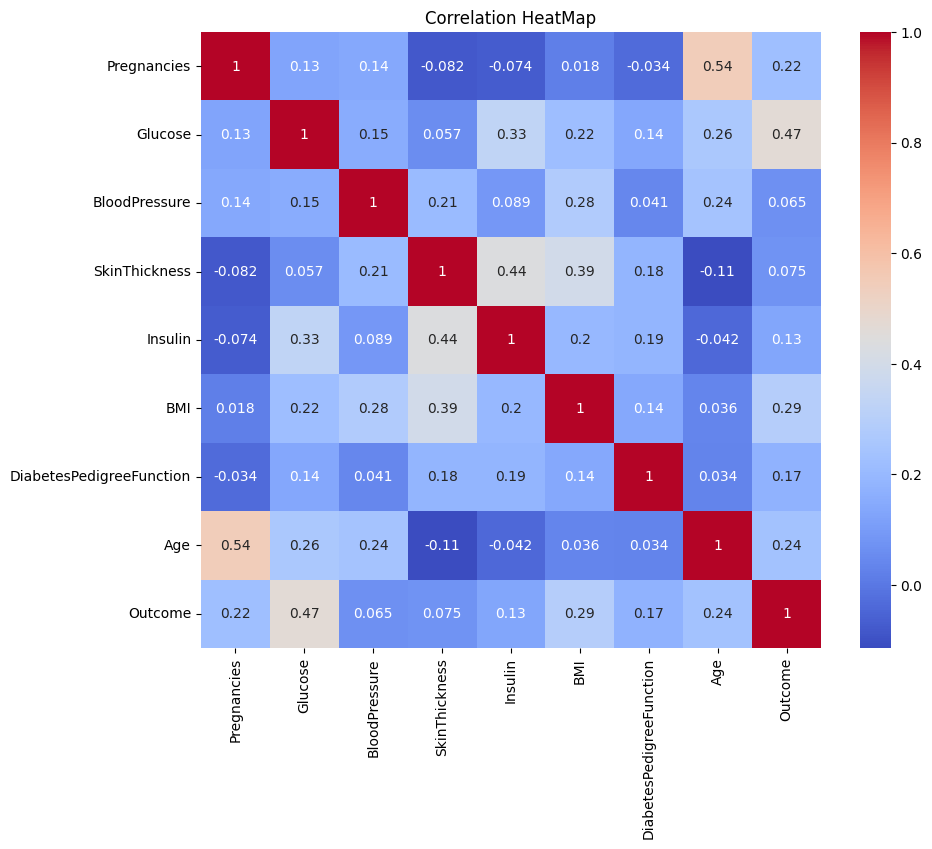

In [36]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation HeatMap')
plt.show()

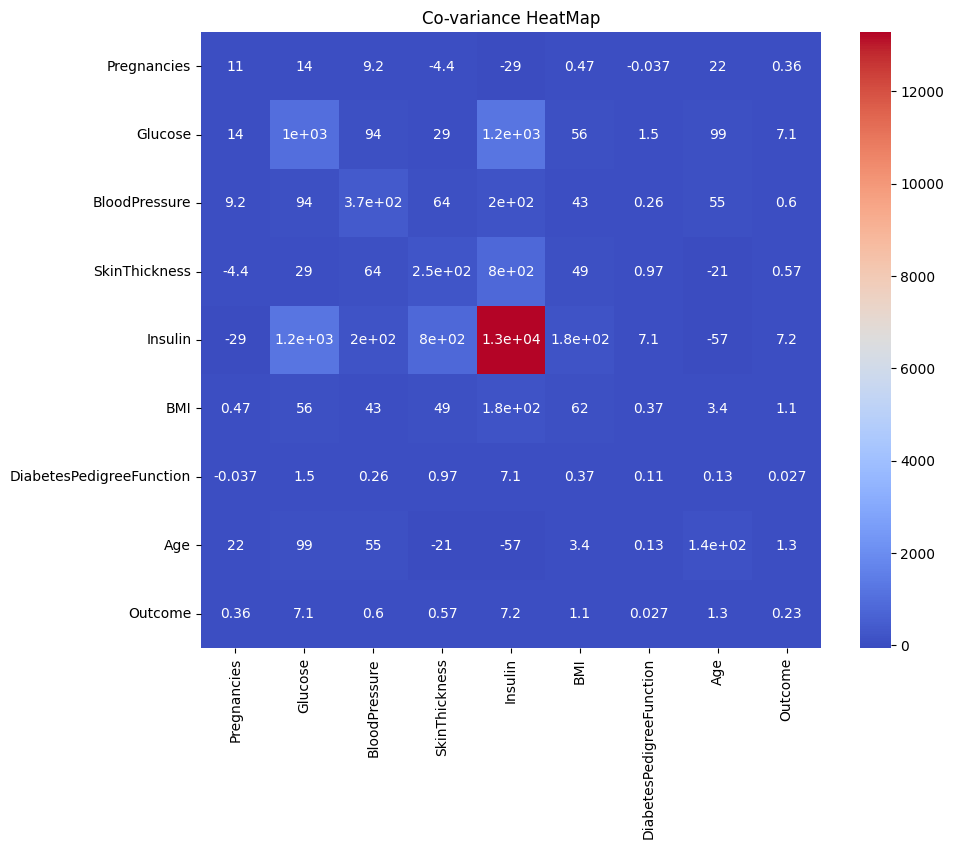

In [37]:
plt.figure(figsize = (10,8))
sns.heatmap(data.cov(), annot = True, cmap = 'coolwarm')
plt.title('Co-variance HeatMap')
plt.show()

In [38]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Hence, it is obvious that an individual is a diabetic person when he/she tends to have more values in those features (Like BMI, Glucose)

## 4. Data Preprocessing

1. In this step, the categorical features(if any) are encoded into numerical data. This is a preliminary step so as to train the model. Since in our dataset, there isn't any categorical variable, encoding isn't required here.
2. These features are standardized by scaler standardization technique, inorder to bring the values between the range of {-1,1}. This is for the efficient working of the Support Vector Classifier algorithm

### Data Separation

In [102]:
X = data.drop('Outcome', axis = 1)
Y = data['Outcome']

### Data Standardization

In [103]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Data Splitting

In [104]:
x_train, x_test, y_train, y_test = train_test_split(X_std, Y, test_size = 0.2, stratify = Y, random_state = 2)

## 5. Model Training


## Support Vector Machine (SVM) Classifier

The Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification tasks. It finds an optimal hyperplane that maximally separates the data points of different classes.

### Loss Function: Hinge Loss

The Hinge Loss is commonly used in SVM classifiers. It measures the loss incurred for misclassifying a sample. For a binary classification problem, the hinge loss can be defined as:

**L(y, f(x)) = max(0, 1 - y * f(x))**

where:
- L(y, f(x)) is the hinge loss,
- y is the true class label (-1 or 1),
- f(x) is the predicted class label. That is f(x) = w.x - b

### Cost Function

The Cost Function in SVM aims to minimize the misclassification error and maximize the margin between the decision boundary and the data points. It can be formulated as:

**J(w) = λ * sum(max(0, 1 - y * f(x))) + (1/2) * ||w||^2**

where:
- J(w) is the cost function,
- λ is the regularization parameter,
- sum(max(0, 1 - y * f(x))) is the sum of hinge losses over all training samples,
- ||w||^2 is the L2 norm of the weight vector.

### Gradient Descent

Gradient Descent is an optimization algorithm used to update the weights iteratively in order to minimize the cost function. The gradient of the cost function with respect to the weights is computed, and the weights are updated in the opposite direction of the gradient. The update rule can be written as:

1) **w = w - learning_rate * (dJ/dw)**
2) **b = b - learning_rate * (dJ/db)**


where:
- w is the weight vector, b is the bias scalar
- learning_rate is the learning rate hyperparameter,
- dJ/dw is the gradient of the cost function with respect to the weights.
- dJ/db is the gradient of the cost function with respect to the bias.


### Condition

There are two conditions for the cost function respectively, and they are

1) when y.f(x) >= 1
2) when y.f(x) <= -1

For the first condition, the gradients are as follows:

1) dJ/dw = 2λw
2) dJ/db = 0

For the second condition, the gradients are as follows:

1) dJ/dw = 2λw - y.x
2) dJ/db = y

In [150]:
class SVM_Classifier():
    def __init__(self, learning_rate = 0.001, lambda_parameter = 0.01, n_iters = 1000):
        self.learning_rate = learning_rate
        self.lambda_parameter = lambda_parameter
        self.n_iters = n_iters
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        rows, features = X.shape
        self.weights = np.zeros(features)
        self.bias = 0
        y = np.where(self.Y == 0, -1, 1)
        for i in range(self.n_iters):
            for index, x in enumerate(self.X):
                condition = y[index] * (np.dot(x, self.weights) - self.bias) >= 1
                if condition:
                    dw = 2 * self.lambda_parameter * self.weights
                else:
                    dw = 2 * self.lambda_parameter * self.weights - (np.dot(y[index], x))
                    db = y[index]
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
    def predict(self, X):
        results = np.dot(X, self.weights) - self.bias
        predictions = np.sign(results)
        y_hat = np.where(predictions <= -1, 0, 1)
        return y_hat

In [151]:
model = SVM_Classifier()

In [152]:
model.fit(x_train, y_train)

## 6. Prediction

The model is tested using the x_train and it predicts the values

In [153]:
pred = model.predict(x_train)

## 7. Evaluation

The trained model is evaluated using various evaluation metrics like accuracy, precision, recall, F1 Score and AUC & ROC characteristics.These metrics provide insights into different aspects of the model's performance, such as its ability to correctly identify positive instances (precision) and its ability to capture all positive instances (recall).


### Accuracy

In machine learning, accuracy is a commonly used metric to evaluate the performance of a classification model. Accuracy measures the proportion of correctly predicted instances out of the total number of instances.


The formula for accuracy is:

![Accuracy Formula](https://latex.codecogs.com/png.latex?%5Cdpi%7B150%7D%20%5Ctext%7BAccuracy%7D%20%3D%20%5Cfrac%7B%5Ctext%7BCorrect%20Predictions%7D%7D%7B%5Ctext%7BTotal%20Predictions%7D%7D)

where:
- **Correct Predictions**: the number of instances that are correctly classified by the model.
- **Total Predictions**: the total number of instances in the dataset.

### Precision

Precision measures the proportion of correctly predicted positive instances out of the total instances predicted as positive. It helps assess the model's accuracy in classifying positive instances.

The formula for precision is:

![Precision Formula](https://latex.codecogs.com/png.latex?%5Cdpi%7B150%7D%20%5Ctext%7BPrecision%7D%20%3D%20%5Cfrac%7B%5Ctext%7BTrue%20Positives%7D%7D%7B%5Ctext%7BTrue%20Positives%7D%20&plus;%20%5Ctext%7BFalse%20Positives%7D%7D)

### Recall

Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances. It helps evaluate the model's ability to capture positive instances.

The formula for recall is:

![Recall Formula](https://latex.codecogs.com/png.latex?%5Cdpi%7B150%7D%20%5Ctext%7BRecall%7D%20%3D%20%5Cfrac%7B%5Ctext%7BTrue%20Positives%7D%7D%7B%5Ctext%7BTrue%20Positives%7D%20&plus;%20%5Ctext%7BFalse%20Negatives%7D%7D)

### F1 Score

The F1 score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance by considering both precision and recall.

The formula for the F1 score is:

![F1 Score Formula](https://latex.codecogs.com/png.latex?%5Cdpi%7B150%7D%20%5Ctext%7BF1%20Score%7D%20%3D%20%5Cfrac%7B2%20%5Ctimes%20%5Ctext%7BPrecision%7D%20%5Ctimes%20%5Ctext%7BRecall%7D%7D%7B%5Ctext%7BPrecision%7D%20&plus;%20%5Ctext%7BRecall%7D%7D)


In [154]:
accuracy = np.sum(pred == y_train) / len(x_train)

In [155]:
print(accuracy)

0.7882736156351792


In [156]:
pred_test = model.predict(x_test)

In [157]:
accuracy_test = np.sum(pred_test == y_test) / len(y_test)
accuracy_test

0.7662337662337663

In [158]:
def calculate_precision(true_positives, false_positives):
    return true_positives / (true_positives + false_positives)

def calculate_recall(true_positives, false_negatives):
    return true_positives / (true_positives + false_negatives)

def calculate_f1_score(precision, recall):
    return (2 * precision * recall) / (precision + recall)


# Calculate true positives, false positives, and false negatives
true_positives = sum([1 for true, pred in zip(y_train, pred) if true == 1 and pred == 1])
false_positives = sum([1 for true, pred in zip(y_train, pred) if true == 0 and pred == 1])
false_negatives = sum([1 for true, pred in zip(y_train, pred) if true == 1 and pred == 0])

# Calculate precision
precision = calculate_precision(true_positives, false_positives)

# Calculate recall
recall = calculate_recall(true_positives, false_negatives)

# Calculate F1 score
f1_score = calculate_f1_score(precision, recall)

print(f"Precision: {precision:.2f}")
print(f"Recall:  {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Precision: 0.75
Recall:  0.58
F1 Score: 0.66


In [159]:
# Calculate true positives, false positives, and false negatives for test data

true_positives_test = sum([1 for true, pred in zip(y_test, pred_test) if true == 1 and pred == 1])
false_positives_test = sum([1 for true, pred in zip(y_test, pred_test) if true == 0 and pred == 1])
false_negatives_test = sum([1 for true, pred in zip(y_test, pred_test) if true == 1 and pred == 0])

# Calculate precision for test set
precision_test = calculate_precision(true_positives_test, false_positives_test)

# Calculate recall for test set
recall_test = calculate_recall(true_positives_test, false_negatives_test)

# Calculate F1 score for test
f1_score_test = calculate_f1_score(precision_test, recall_test)


print("The metrics for test set")
print(f"Precision: {precision_test:.2f}")
print(f"Recall:  {recall_test:.2f}")
print(f"F1 Score: {f1_score_test:.2f}")

The metrics for test set
Precision: 0.75
Recall:  0.50
F1 Score: 0.60


**ROC (Receiver Operating Characteristic) Curve**

The ROC curve is a graphical representation of the performance of a binary classification model. It illustrates the trade-off between the true positive rate (TPR) and the false positive rate (FPR) at various classification thresholds.

Formula for True Positive Rate (TPR):
```
TPR = TP / (TP + FN)
```

Formula for False Positive Rate (FPR):
```
FPR = FP / (FP + TN)
```

**AUC (Area Under the Curve)**

The AUC is a metric that quantifies the overall performance of a binary classification model based on the ROC curve. It represents the area under the ROC curve and provides a single scalar value to compare different models.


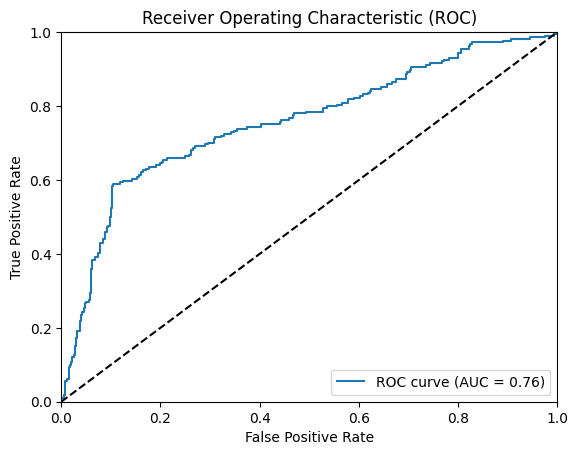

AUC: 0.7561448598130843


In [160]:
def calculate_roc_auc(labels, scores):
    # Combine the labels and scores into a single array
    data = np.column_stack((labels, scores))
    
    # Sort the data based on the scores in descending order
    sorted_data = data[data[:, 1].argsort()[::-1]]
    
    # Calculate the number of positive examples
    num_positives = np.sum(labels == 1)
    
    # Calculate the number of negative examples
    num_negatives = len(labels) - num_positives
    
    # Initialize variables for the AUC calculation
    tp = 0  # True positives
    fp = 0  # False positives
    prev_fpr = 0  # Previous false positive rate
    prev_tpr = 0  # Previous true positive rate
    auc = 0  # Area under the curve
    
    # Initialize lists for storing FPR and TPR values
    fpr_values = []
    tpr_values = []
    
    # Iterate over the sorted data and update the AUC values
    for i in range(len(sorted_data)):
        label = sorted_data[i, 0]
        
        if label == 1:
            tp += 1
        else:
            fp += 1
            
        tpr = tp / num_positives
        fpr = fp / num_negatives
        
        # Calculate the trapezoidal area under the curve
        auc += (fpr - prev_fpr) * (tpr + prev_tpr) / 2
        
        prev_fpr = fpr
        prev_tpr = tpr
        
        # Store FPR and TPR values for plotting the ROC curve
        fpr_values.append(fpr)
        tpr_values.append(tpr)
    
    # Plot the ROC curve
    plt.plot(fpr_values, tpr_values, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    
    return auc

auc = calculate_roc_auc(y_train, pred)
print("AUC:", auc)


## 8. Predictive System

Once, the model has been trained, input values can be entered so as to predict whether an individual has diabetes or not

In [161]:
input_data = pd.Series([5,166,72,19,175,25.8,0.587,51])
std_data = scaler.transform(input_data.values.reshape(1,-1))
prediction = model.predict(std_data)
print("Unfortunately, the person is diabetic" if prediction[0] == 1 else "Alright, the person is healthy")

Unfortunately, the person is diabetic


C:\Users\cgkck\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## The END